In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
breast_cancer= load_breast_cancer()
df = pd.DataFrame(data= breast_cancer.data,
                  columns= breast_cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
breast_cancer['target'][0]

0

In [5]:
df['target']= breast_cancer['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble     import RandomForestClassifier
from sklearn.svm          import SVC
from sklearn.neighbors    import KNeighborsClassifier



models= {"Logistic Regression": LogisticRegression(),
         "Random Forest": RandomForestClassifier(),
         "Support Vector Classifier": SVC(),
         "KNN": KNeighborsClassifier()}

In [7]:
X= df.drop('target' , axis=1)
y= df['target']


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler= StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [9]:
def classify (models , X_train , X_test , y_train , y_test):
    
    model_scores= {}
    
    for name , model in models.items():

        model.fit(X_train , y_train)
    
        model_scores[name]= model.score(X_test , y_test)
        
    return model_scores

In [10]:
model_scores= classify(models=models,
                      X_train= X_train,
                      X_test= X_test,
                      y_train= y_train,
                      y_test= y_test)
model_scores

{'Logistic Regression': 0.9736842105263158,
 'Random Forest': 0.9649122807017544,
 'Support Vector Classifier': 0.9824561403508771,
 'KNN': 0.9473684210526315}

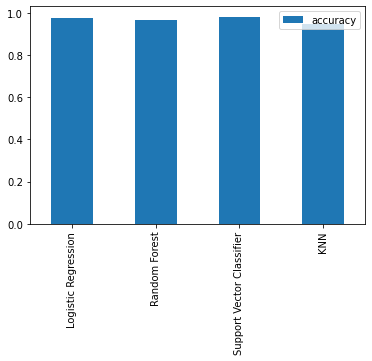

In [11]:
models_compare= pd.DataFrame(model_scores , index=['accuracy'])

models_compare.T.plot.bar();

Support Vector Classifier is the best model.

In [12]:
clf= SVC()
clf.fit(X_train , y_train)

y_pred= clf.predict(X_test)

from sklearn.metrics import accuracy_score

print(f'SVC accuracy is: {accuracy_score(y_test , y_pred) * 100 :.2f} %')

SVC accuracy is: 98.25 %


In [13]:
from sklearn.model_selection import cross_val_score

cross_validation_scores= cross_val_score(clf , X , y , cv=5)

print(pd.Series(cross_validation_scores))

print(f'Mean of cross validation: {np.mean(cross_validation_scores)*100:.2f}%')



0    0.850877
1    0.894737
2    0.929825
3    0.947368
4    0.938053
dtype: float64
Mean of cross validation: 91.22%


Findiding the best n for KNN.

In [14]:
knn_scores= []
for i in range (1 , 12):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train , y_train)
    accuracy= knn.score(X_test , y_test)
    knn_scores.append(accuracy)
    
    print(f'the accuracy of {i} neighbor is: {knn.score(X_test , y_test)*100 :.2f} %')

the accuracy of 1 neighbor is: 93.86 %
the accuracy of 2 neighbor is: 93.86 %
the accuracy of 3 neighbor is: 94.74 %
the accuracy of 4 neighbor is: 95.61 %
the accuracy of 5 neighbor is: 94.74 %
the accuracy of 6 neighbor is: 95.61 %
the accuracy of 7 neighbor is: 94.74 %
the accuracy of 8 neighbor is: 95.61 %
the accuracy of 9 neighbor is: 96.49 %
the accuracy of 10 neighbor is: 95.61 %
the accuracy of 11 neighbor is: 95.61 %


Text(0.5, 0, 'K Value')

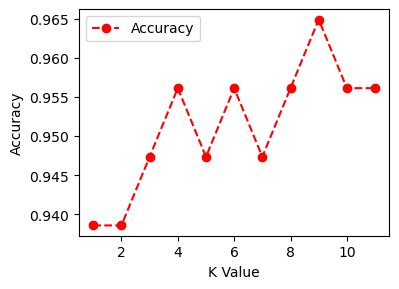

In [20]:
plt.figure(figsize=(4,3),dpi=100)
plt.plot(range(1,12),knn_scores ,label='Accuracy' , color='red', marker='o', linestyle='--' )
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel("K Value")

It seems that k=9 gives the best accuracy

In [19]:
knn_k9 = KNeighborsClassifier(n_neighbors= 9)

knn_k9.fit(X_train , y_train)
knn_k9_y_preds = knn_k9.predict(X_test)

print(f"Accuracy of KNN model with k=9 is {accuracy_score(y_test , knn_k9_y_preds)*100:.2f}%")

Accuracy of KNN model with k=9 is 96.49%


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



<AxesSubplot:>

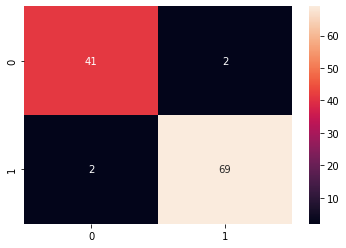

In [26]:
from sklearn.metrics import classification_report , confusion_matrix

print(classification_report(y_test , knn_k9_y_preds))

sns.heatmap(confusion_matrix(y_test , knn_k9_y_preds), annot= True)



Findiding the best number of estimators for Random Forest model using GridSearchCV.

In [33]:
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import GridSearchCV

n_estimators=range(20 , 100 , 10)
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]


param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}


rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)


grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': range(20, 100, 10),
                         'oob_score': [True, False]})

In [34]:
grid.best_params_

{'bootstrap': True, 'max_features': 3, 'n_estimators': 60, 'oob_score': True}

In [35]:
predictions = grid.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

